In [ ]:
#import depndencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt


In [ ]:
#reading data for years 2016, 2017, 2018 from the csv files
crimedata_2016 = pd.read_csv("2016_Annual_Crime.csv")
crimedata_2017 = pd.read_csv("2017_Annual_Crime.csv")
crimedata_2018 = pd.read_csv("2018_Annual_Crime.csv")

In [ ]:
#get unique crime categories
crimedata_2018["Category Description"].unique()
crimedata_2016["Category Description"].unique()
#crimedata_2018.head()

In [ ]:
#some of the records for 2016 and 2018 occured at earlier years - 2017 records are fine
#but were reported in these years. So this will skew our data
#Resolution: will focus just on records that occured and were reported on that same year

crimedata_2016 = crimedata_2016[crimedata_2016['Occurred Date'] == crimedata_2016['Report Date']]

crimedata_2018 = crimedata_2018[crimedata_2018['Occurred Date'] == crimedata_2018['Report Date']]
len(crimedata_2018['Incident Number'].unique())

In [ ]:
#getting the different columns of interest
cleaned_crimedata_2016_df = crimedata_2016[["Category Description", 
                              "Report Date","Zip Codes"]]
cleaned_crimedata_2017_df = crimedata_2017[["Highest NIBRS/UCR Offense Description", 
                              "GO Report Date","GO Location Zip"]]
cleaned_crimedata_2018_df = crimedata_2018[["Category Description", 
                              "Report Date","Zip Codes"]]
cleaned_crimedata_2018_df.head(2)

In [ ]:
#note the count of records before dropping null entries
cleaned_crimedata_2016_df.count()
cleaned_crimedata_2017_df.count()
cleaned_crimedata_2018_df.count()

In [ ]:
#drop rows/columns with null values 
cleaned_crimedata_2016_df = cleaned_crimedata_2016_df.dropna(how='any')
cleaned_crimedata_2017_df = cleaned_crimedata_2017_df.dropna(how='any')
cleaned_crimedata_2018_df = cleaned_crimedata_2018_df.dropna(how='any')

#cleaned_crimedata_2016_df.count()
#cleaned_crimedata_2018_df.head()

In [ ]:
#rename some of the columns to be more descriptive
cleaned_crimedata_2017_df = cleaned_crimedata_2017_df.rename(columns={"Highest NIBRS/UCR Offense Description":"Offense",
                                   "GO Report Date": "Report Date",
                                   "GO Location Zip":"Zip Code"})
cleaned_crimedata_2018_df = cleaned_crimedata_2018_df.rename(columns={"Category Description":"Offense"})
cleaned_crimedata_2016_df = cleaned_crimedata_2016_df.rename(columns={"Category Description":"Offense"})
#cleaned_crimedata_2016_df.head()
#cleaned_crimedata_2018_df['Report Date'].dtype

In [ ]:
#convert the date field to datetime object/format
cleaned_crimedata_2016_df["Report Date - converted"] = pd.to_datetime(cleaned_crimedata_2016_df["Report Date"])
cleaned_crimedata_2017_df["Report Date - converted"] = pd.to_datetime(cleaned_crimedata_2017_df["Report Date"])
cleaned_crimedata_2018_df["Report Date - converted"] = pd.to_datetime(cleaned_crimedata_2018_df["Report Date"])
cleaned_crimedata_2016_df.head()

#get the month
cleaned_crimedata_2016_df["Month Number"] = cleaned_crimedata_2016_df["Report Date - converted"].dt.month
cleaned_crimedata_2017_df["Month Number"] = cleaned_crimedata_2017_df["Report Date - converted"].dt.month
cleaned_crimedata_2018_df["Month Number"] = cleaned_crimedata_2018_df["Report Date - converted"].dt.month
cleaned_crimedata_2017_df.head()

#get the week number
cleaned_crimedata_2016_df["Week #"] = cleaned_crimedata_2016_df["Report Date - converted"].dt.week
cleaned_crimedata_2017_df["Week #"] = cleaned_crimedata_2017_df["Report Date - converted"].dt.week
cleaned_crimedata_2018_df["Week #"] = cleaned_crimedata_2018_df["Report Date - converted"].dt.week
cleaned_crimedata_2017_df.head()
#strftime()
#cleaned_crimedata_2017_df["Year"] = cleaned_crimedata_2017_df["report date - converted"].dt.year
#cleaned_crimedata_2017_df.head()

#cleaned_crimedata_2017_df["Month Name"] = cd.month_name[cleaned_crimedata_2017_df["Month Number"]]
#(calendar.month_name[month_idx])

#cleaned_crimedata_2017_df["Week #"] = cleaned_crimedata_2017_df["report date - converted"].dt.week



In [ ]:
#Note the week # for 2018
cleaned_crimedata_2018_df["Report Date - converted"] = pd.to_datetime(cleaned_crimedata_2018_df["Report Date"])

cleaned_crimedata_2018_df["Month Number"] = cleaned_crimedata_2018_df["Report Date - converted"].dt.month
cleaned_crimedata_2018_df.head()

cleaned_crimedata_2018_df["Week #"] = cleaned_crimedata_2018_df["Report Date - converted"].dt.week
record = cleaned_crimedata_2018_df[cleaned_crimedata_2018_df['Report Date'] == '11/15/2018']
#record.head()

In [ ]:
cleaned_crimedata_2018_df.head()

In [ ]:
#first half of the year data 
fh_crimedata_2016_df = cleaned_crimedata_2016_df[cleaned_crimedata_2016_df['Week #'] < 27]
fh_crimedata_2017_df = cleaned_crimedata_2017_df[cleaned_crimedata_2017_df['Week #'] < 27]
fh_crimedata_2018_df = cleaned_crimedata_2018_df[cleaned_crimedata_2018_df['Week #'] < 27]
fh_crimedata_2016_df.count()

In [ ]:
#
len(fh_crimedata_2017_df["Offense"].sum())    #total crimes during the first half of the year
fh_crimedata_2016_df["Offense"].value_counts()
fh_crimedata_2017_df["Offense"].value_counts()
fh_crimedata_2018_df["Offense"].value_counts()

#cleaned_crimedata_2017_df = cleaned_crimedata_2017_df.replace({})

In [ ]:
#number of weeks
len(fh_crimedata_2016_df['Week #'].unique())
fh_crimedata_2018_df['Week #'].unique()


In [ ]:
#combining Auto Theft records to theft record
fh_crimedata_2016_df = fh_crimedata_2016_df.replace({"Auto Theft":"Theft"})
fh_crimedata_2017_df = fh_crimedata_2017_df.replace({"Auto Theft":"Theft"})
fh_crimedata_2018_df = fh_crimedata_2018_df.replace({"Auto Theft":"Theft"})

fh_crimedata_2018_df["Offense"].value_counts()

In [ ]:
#grouping records by Week # and Offense types
group_crimedata_2016 = fh_crimedata_2016_df.groupby(("Week #", "Offense"))#, "Year"))
group_crimedata_2017 = fh_crimedata_2017_df.groupby(("Week #", "Offense"))#, "Year"))
group_crimedata_2018 = fh_crimedata_2018_df.groupby(("Week #", "Offense"))#, "Year"))


In [ ]:
#group_crimedata_2017_df is abbreviated gcd_2017_df
gcd_2016_df = group_crimedata_2016.count()
gcd_2017_df = group_crimedata_2017.count()
gcd_2018_df = group_crimedata_2018.count()


In [ ]:
#Get useful data from the grouped data
gcd_2016_df = gcd_2016_df.reset_index().rename(columns={'Month Number':'Count'})
gcd_2017_df = gcd_2017_df.reset_index().rename(columns={'Month Number':'Count'})
gcd_2018_df = gcd_2018_df.reset_index().rename(columns={'Month Number':'Count'})


In [ ]:
#get useful column from the grouped data
gcd_2016_df = gcd_2016_df[['Week #','Offense','Count']]
gcd_2017_df = gcd_2017_df[['Week #','Offense','Count']]
gcd_2018_df = gcd_2018_df[['Week #','Offense','Count']]

gcd_2017_df.tail()

In [ ]:
#Useful Report information for the different years
#theft records

#2016 thefts
theft_info_2016 = gcd_2016_df.loc[gcd_2016_df['Offense']=='Theft']
max_theft_2016 = theft_info_2016['Count'].max()
min_theft_2016 = theft_info_2016['Count'].min()
max_theft_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==max_theft_2016]
min_theft_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==min_theft_2016]

#2017 thefts
theft_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Theft']
max_theft_2017 = theft_info_2017['Count'].max()
min_theft_2017 = theft_info_2017['Count'].min()
max_theft_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_theft_2017]
min_theft_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_theft_2017]

#2018 thefts
theft_info_2018 = gcd_2018_df.loc[gcd_2018_df['Offense']=='Theft']
max_theft_2018 = theft_info_2018['Count'].max()
min_theft_2018 = theft_info_2018['Count'].min()
max_theft_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==max_theft_2018]
min_theft_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==min_theft_2018]


max_theft_week_2017

In [ ]:
#max_theft_2017
max_theft_week_2017 
#min_theft_week_2017

#max_theft = gcd_2017_df.loc[gcd_2017_df['Count']==(gcd_2017_df.loc[gcd_2017_df['Offense']=='Theft'].max())] 
#week_dat['Count']
#week_dat
#week_dat1
#gcd_2017_df.head()


#gcd_2017_df.loc[gcd_2017_df['Offense']=='Theft'].max(gcd_2017_df['Count'])

In [ ]:
#Aggravated Assault records
#2016 aggravated assaults
agg_info_2016 = gcd_2016_df.loc[gcd_2016_df['Offense']=='Aggravated Assault']
max_agg_num_2016 = agg_info_2016['Count'].max()
min_agg_num_2016 = agg_info_2016['Count'].min()
max_agg_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==max_agg_num_2016]
min_agg_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==min_agg_num_2016]

#2017 aggravated assaults
agg_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Agg Assault']
max_agg_num_2017 = agg_info_2017['Count'].max()
min_agg_num_2017 = agg_info_2017['Count'].min()
max_agg_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_agg_num_2017]
min_agg_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_agg_num_2017]

#2018 aggravated assaults
agg_info_2018 = gcd_2018_df.loc[gcd_2018_df['Offense']=='Aggravated Assault']
max_agg_num_2018 = agg_info_2018['Count'].max()
min_agg_num_2018 = agg_info_2018['Count'].min()
max_agg_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==max_agg_num_2018]
min_agg_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==min_agg_num_2018]

#min_agg_week_2018
#agg_info_2018

In [ ]:
#max agg_assault record
max_agg_num_2017
max_agg_week_2017
#min agg_assault record
min_agg_num_2017
min_agg_week_2017

cleaned_crimedata_2016_df['Offense'].unique()

In [ ]:
#Burglary records
#2016 Burglary
burg_info_2016 = gcd_2016_df.loc[gcd_2016_df['Offense']=='Burglary']
max_burg_num_2016 = burg_info_2016['Count'].max()
min_burg_num_2016 = burg_info_2016['Count'].min()
max_burg_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==max_burg_num_2016]
min_burg_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==min_burg_num_2016]

#2017 aggravated assaults
burg_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Burglary']
max_burg_num_2017 = burg_info_2017['Count'].max()
min_burg_num_2017 = burg_info_2017['Count'].min()
max_burg_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_burg_num_2017]
min_burg_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_burg_num_2017]

#2018 aggravated assaults
burg_info_2018 = gcd_2018_df.loc[gcd_2018_df['Offense']=='Burglary']
max_burg_num_2018 = burg_info_2018['Count'].max()
min_burg_num_2018 = burg_info_2018['Count'].min()
max_burg_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==max_burg_num_2018]
min_burg_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==min_burg_num_2018]

min_burg_week_2018

In [ ]:
cleaned_crimedata_2016_df['Offense'].unique()

In [ ]:
#Robbery records
#2016 Robbery
rob_info_2016 = gcd_2016_df.loc[gcd_2016_df['Offense']=='Robbery']
max_rob_num_2016 = rob_info_2016['Count'].max()
min_rob_num_2016 = rob_info_2016['Count'].min()
max_rob_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==max_rob_num_2016]
min_rob_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==min_rob_num_2016]

#2017 Robbery
rob_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Robbery']
max_rob_num_2017 = rob_info_2017['Count'].max()
min_rob_num_2017 = rob_info_2017['Count'].min()
max_rob_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_rob_num_2017]
min_rob_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_rob_num_2017]

#2018 Robbery
rob_info_2018 = gcd_2018_df.loc[gcd_2018_df['Offense']=='Robbery']
max_rob_num_2018 = rob_info_2018['Count'].max()
min_rob_num_2018 = rob_info_2018['Count'].min()
max_rob_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==max_rob_num_2018]
min_rob_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==min_rob_num_2018]

max_rob_week_2016

In [ ]:
#Murder records
#2016 Murder
murd_info_2016 = gcd_2016_df.loc[gcd_2016_df['Offense']=='Murder']
max_murd_num_2016 = murd_info_2016['Count'].max()
min_murd_num_2016 = murd_info_2016['Count'].min()
max_murd_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==max_murd_num_2016]
min_murd_week_2016 = gcd_2016_df.loc[gcd_2016_df['Count']==min_murd_num_2016]

#2017 Murder
murd_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Murder']
max_murd_num_2017 = murd_info_2017['Count'].max()
min_murd_num_2017 = murd_info_2017['Count'].min()
max_murd_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_murd_num_2017]
min_murd_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_murd_num_2017]

#2018 Murder
murd_info_2018 = gcd_2018_df.loc[gcd_2018_df['Offense']=='Murder']
max_murd_num_2018 = murd_info_2018['Count'].max()
min_murd_num_2018 = murd_info_2018['Count'].min()
max_murd_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==max_murd_num_2018]
min_murd_week_2018 = gcd_2018_df.loc[gcd_2018_df['Count']==min_murd_num_2018]

#max_murd_week_2018

In [101]:
#gcd_2016_df['Offense']=='Aggravated Assault'

(0.25, 26.75)

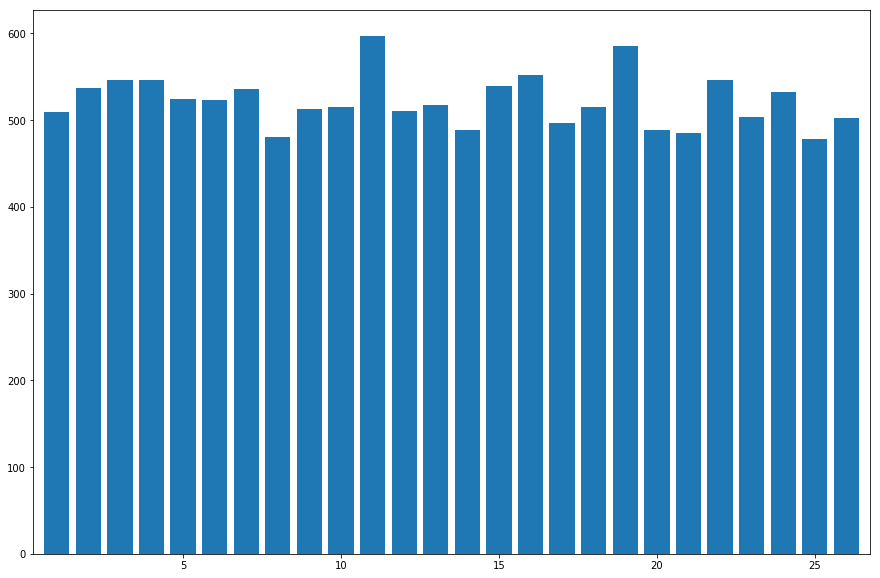

In [102]:
#plot for 2017
plt.figure(figsize=(15,10))
plt.bar(gcd_2017_df['Week #'], gcd_2017_df['Count'], label=gcd_2017_df['Offense']=='Agg Assault')
plt.xlim(0.25, len(fh_crimedata_2017_df['Week #'].unique())+0.75)

In [ ]:
#plot for 2016
plt.figure(figsize=(15,10))
plt.bar(gcd_2016_df['Week #'], gcd_2016_df['Count'], label=gcd_2016_df['Offense'])
plt.xlim(0.25, len(fh_crimedata_2016_df['Week #'].unique())+0.75)

In [98]:
#gcd_2016_df['Week #']

In [ ]:
#plot for 2018
plt.figure(figsize=(15,10))
plt.bar(gcd_2018_df['Week #'], gcd_2018_df['Count'], label=gcd_2018_df['Offense'])
plt.xlim(0.25, len(fh_crimedata_2018_df['Week #'].unique())+0.75)

In [174]:
#agg_info_2018.head()

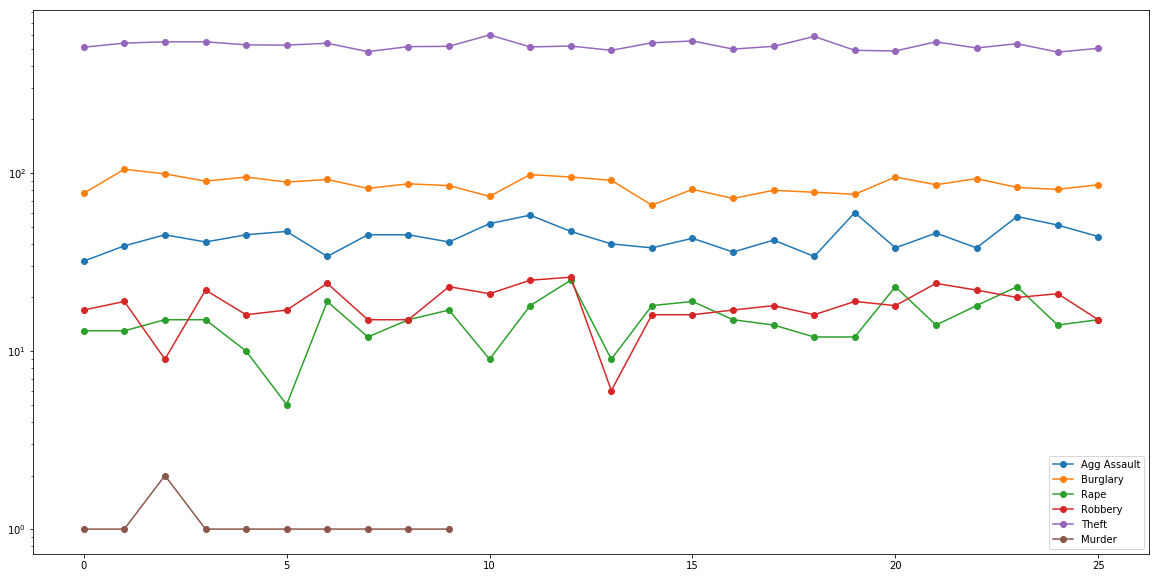

In [133]:
#gcd_2017_df

plt.figure(figsize=[20, 10])
#x_axis = np.arange(364)
for offense in gcd_2017_df['Offense'].unique():
    plt.plot(np.arange(len(gcd_2017_df[gcd_2017_df['Offense'] == offense]['Count'])), 
             gcd_2017_df[gcd_2017_df['Offense'] == offense]['Count'], marker='o', label=offense)
    #x_axis = x_axis + 0.1
#plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlim(0, len(gcd_2017_df['Week #'].unique())+1.75)
plt.yscale('log')
plt.legend()

In [ ]:

#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#plt.plot(months, gcd_2017_df.iloc[4:9]#,"District"])

#plt.show()

#group_crime_2017["Offense"].count().plot.line()

In [ ]:
#gcd_2017_df[gcd_2017_df['Offense'] == 'Robbery']['Count']